In [1]:
import numpy as np
import sklearn
import pickle
import pandas as pd
import seaborn as sns
#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Load the dataset
# There are 4 datasets. We will use the bank_full and bank_additional_full
df_full = pd.read_csv('bank-full.csv',sep=';')
df_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Check the shape of the dataframe
df_full.shape

(45211, 17)

In [4]:
# Check the columns of the dataframe
df_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
# Statistical details of the numric columns of the dataset
df_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# details of dataset
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Input variables:

1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [7]:
# Are there null values?
df_full.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# Now, load the bank_addition_full dataset. This contains some additional macroeconomic variables.
df_addi_full = pd.read_csv('bank-additional-full.csv',sep=';')
df_addi_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
# This dataset(additional_full) has all columns(21)
df_addi_full.shape

(41188, 21)

In [10]:
df_addi_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

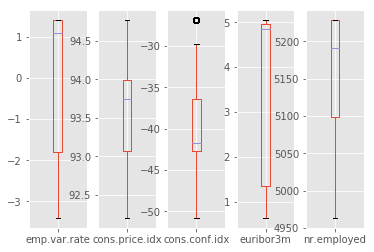

In [11]:
# Perform a boxplot for the columns which depict macro-economic variables
cols = ['emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']
df_addi_full[cols].plot(kind='box', subplots= True)
plt.show()

In [12]:
# Create a new Euribor3m range column
df_addi_full['euribor3m_range'] = pd.cut(df_addi_full.euribor3m, bins=[0,1,2,3,4,5], labels=['0-1','1-2','2-3','3-4','4-5'])



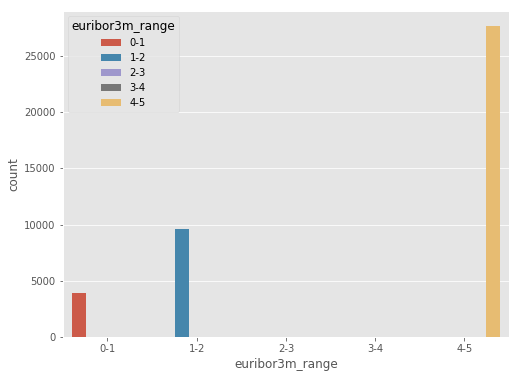

In [13]:
#plotting Euribor -3m rate - quarterly indicator for interbank lending rate
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='euribor3m_range', hue='euribor3m_range', data=df_addi_full)

In [14]:
df_addi_full['cons.price.idx'].unique()

array([ 93.994,  94.465,  93.918,  93.444,  93.798,  93.2  ,  92.756,
        92.843,  93.075,  92.893,  92.963,  92.469,  92.201,  92.379,
        92.431,  92.649,  92.713,  93.369,  93.749,  93.876,  94.055,
        94.215,  94.027,  94.199,  94.601,  94.767])

In [15]:
# Create a consumer price index range column
df_addi_full['cons_price_range'] = pd.cut(df_addi_full['cons.price.idx'], bins=[92,93,94,95], labels=['92-93','93-94','94-95'])


In [16]:
df_addi_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
age                 41188 non-null int64
job                 41188 non-null object
marital             41188 non-null object
education           41188 non-null object
default             41188 non-null object
housing             41188 non-null object
loan                41188 non-null object
contact             41188 non-null object
month               41188 non-null object
day_of_week         41188 non-null object
duration            41188 non-null int64
campaign            41188 non-null int64
pdays               41188 non-null int64
previous            41188 non-null int64
poutcome            41188 non-null object
emp.var.rate        41188 non-null float64
cons.price.idx      41188 non-null float64
cons.conf.idx       41188 non-null float64
euribor3m           41188 non-null float64
nr.employed         41188 non-null float64
y                   41188 non-null object
euribor3m

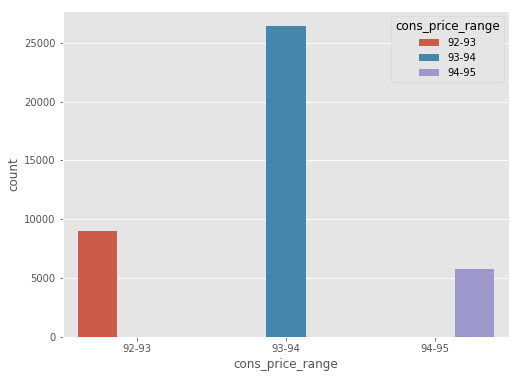

In [17]:
#plotting Consumer price index
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='cons_price_range', hue='cons_price_range', data=df_addi_full)

In [18]:
#Describing dummy keys of the output variable column
y_n_lookup ={'yes' : 1, 'no' : 0}
df_addi_full['y_dummy'] = df_addi_full['y'].map(lambda x: y_n_lookup[x])
df_addi_full['y_dummy'].value_counts()

0    36548
1     4640
Name: y_dummy, dtype: int64

In [19]:
#getting marital status and age group of people
age_group_names = ['young', 'lower middle', 'middle', 'senior']
df_addi_full['age_binned'] = pd.qcut(df_addi_full['age'], 4, labels = age_group_names)
df_addi_full['age_binned'].value_counts()
gb_marital_age = df_addi_full['y_dummy'].groupby([df_addi_full['marital'],df_addi_full['age_binned']] ) 
gb_marital_age.mean()

marital   age_binned  
divorced  young           0.074148
          lower middle    0.093649
          middle          0.082001
          senior          0.134097
married   young           0.098465
          lower middle    0.092071
          middle          0.075517
          senior          0.135865
single    young           0.166407
          lower middle    0.117267
          middle          0.087753
          senior          0.108974
unknown   young           0.250000
          lower middle    0.041667
          middle          0.333333
          senior          0.115385
Name: y_dummy, dtype: float64

There are seven groups which responded better than average to the campaign:
1. Divorced - Senior
2. Married - Senior
3. Single - Young
4. Single - Lower middle
5. Unknown - Young
6. Unknown - Middle
7. Unknown - Senior

In [20]:
df_addi_full['y_dummy'].mean()

0.11265417111780131

In [21]:
#unstack (Pivot a level of the (necessarily hierarchical) index labels) groupby marital status
gb_marital_age.mean().unstack()

age_binned,young,lower middle,middle,senior
marital,,,,
divorced,0.074148,0.093649,0.082001,0.134097
married,0.098465,0.092071,0.075517,0.135865
single,0.166407,0.117267,0.087753,0.108974
unknown,0.250000,0.041667,0.333333,0.115385


In [22]:
#Has housing, has loan and has default status of groupby people

gb_has_loan_default = df_addi_full['y_dummy'].groupby([df_addi_full['housing'],df_addi_full['loan'],df_addi_full['default']] ) 
gb_has_loan_default.mean()

housing  loan     default
no       no       no         0.124465
                  unknown    0.052936
                  yes        0.000000
         yes      no         0.124502
                  unknown    0.043716
unknown  unknown  no         0.125819
                  unknown    0.048458
yes      no       no         0.134031
                  unknown    0.051909
                  yes        0.000000
         yes      no         0.125674
                  unknown    0.049793
Name: y_dummy, dtype: float64

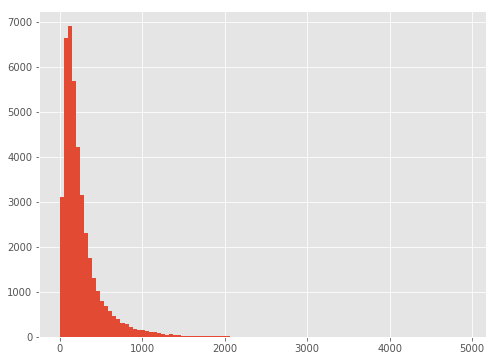

In [23]:
# Plot of a histogram of duration is shown below
df_addi_full['duration'].hist(bins=100, histtype ='bar')

In [24]:
print('max duration',df_addi_full['duration'].max())
print('min duration',df_addi_full['duration'].min())
print('mean duration',df_addi_full['duration'].mean())

max duration 4918
min duration 0
mean duration 258.2850101971448


In [25]:
# Create Duration range 
df_addi_full['duration_range'] = pd.cut(df_addi_full['duration'], bins=[0,600,1200,1800,2400,3000,3600,4200,4800,5400], labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90'])
df_addi_full.head(20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,euribor3m_range,cons_price_range,y_dummy,age_binned,duration_range
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,4-5,93-94,0,senior,0-10
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,4-5,93-94,0,senior,0-10
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,4-5,93-94,0,lower middle,0-10
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,4-5,93-94,0,middle,0-10
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,4-5,93-94,0,senior,0-10
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,4-5,93-94,0,middle,0-10
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,4-5,93-94,0,senior,0-10
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,4-5,93-94,0,middle,0-10
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,4-5,93-94,0,young,0-10
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,4-5,93-94,0,young,0-10


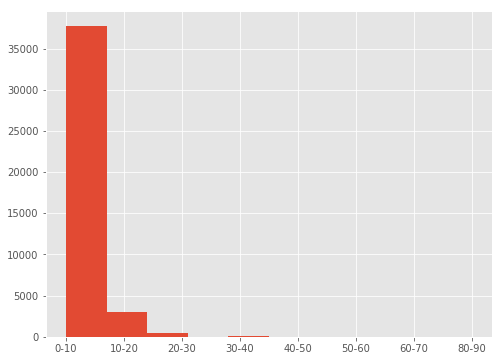

In [26]:
# Most of the calls were in 0-10 minutes slots. And there were few in 10-20 minutes slots.
df_addi_full['duration_range'].hist(histtype ='bar')

In [27]:
#Create a dataframe with records having duration of less than 1000 seconds (approx 18 minutes)
df_1000_dur = df_addi_full[df_addi_full['duration'] < 1000]
df_1000_dur.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40227 entries, 0 to 41187
Data columns (total 26 columns):
age                 40227 non-null int64
job                 40227 non-null object
marital             40227 non-null object
education           40227 non-null object
default             40227 non-null object
housing             40227 non-null object
loan                40227 non-null object
contact             40227 non-null object
month               40227 non-null object
day_of_week         40227 non-null object
duration            40227 non-null int64
campaign            40227 non-null int64
pdays               40227 non-null int64
previous            40227 non-null int64
poutcome            40227 non-null object
emp.var.rate        40227 non-null float64
cons.price.idx      40227 non-null float64
cons.conf.idx       40227 non-null float64
euribor3m           40227 non-null float64
nr.employed         40227 non-null float64
y                   40227 non-null object
euribor3m

In [28]:
df_1000_dur['dur_1000_range'] = pd.cut(df_1000_dur['duration'], bins=[0,100,200,300,400,500,600,700,800,900,1000], labels=['0-100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800-900','900-1000'])
df_1000_dur.head(5)

/Users/dipanjanbandyopadhyay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.conf.idx,euribor3m,nr.employed,y,euribor3m_range,cons_price_range,y_dummy,age_binned,duration_range,dur_1000_range
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,4-5,93-94,0,senior,0-10,200-300
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,4-5,93-94,0,senior,0-10,100-200
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,4-5,93-94,0,lower middle,0-10,200-300
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-36.4,4.857,5191.0,no,4-5,93-94,0,middle,0-10,100-200
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,-36.4,4.857,5191.0,no,4-5,93-94,0,senior,0-10,300-400


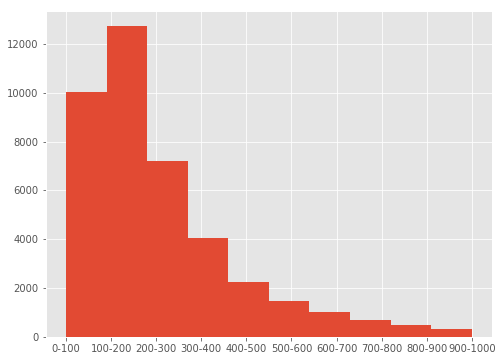

In [29]:
df_1000_dur['dur_1000_range'].hist(histtype ='bar')

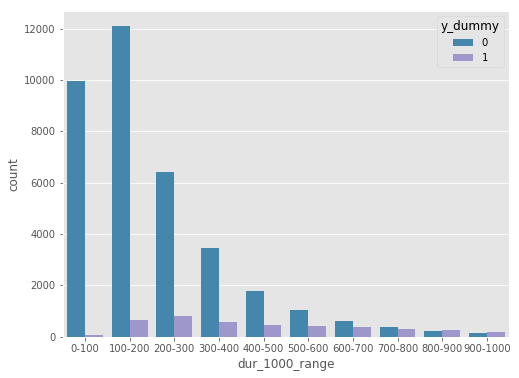

In [30]:
sns.countplot(x="dur_1000_range", hue="y_dummy", data=df_1000_dur, palette=["C1","C2"])

In [31]:
df_addi_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_dummy
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [32]:
# Was there a previous contact made to the same customer?
df_previous = df_addi_full[df_addi_full['previous']>0]
df_previous.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 24013 to 41187
Data columns (total 26 columns):
age                 5625 non-null int64
job                 5625 non-null object
marital             5625 non-null object
education           5625 non-null object
default             5625 non-null object
housing             5625 non-null object
loan                5625 non-null object
contact             5625 non-null object
month               5625 non-null object
day_of_week         5625 non-null object
duration            5625 non-null int64
campaign            5625 non-null int64
pdays               5625 non-null int64
previous            5625 non-null int64
poutcome            5625 non-null object
emp.var.rate        5625 non-null float64
cons.price.idx      5625 non-null float64
cons.conf.idx       5625 non-null float64
euribor3m           5625 non-null float64
nr.employed         5625 non-null float64
y                   5625 non-null object
euribor3m_range     5625 no

In [33]:
df_previous.previous.unique()

array([1, 2, 3, 4, 5, 6, 7])

Text(0.5,1,'Was there a previous contact with the same customer?')

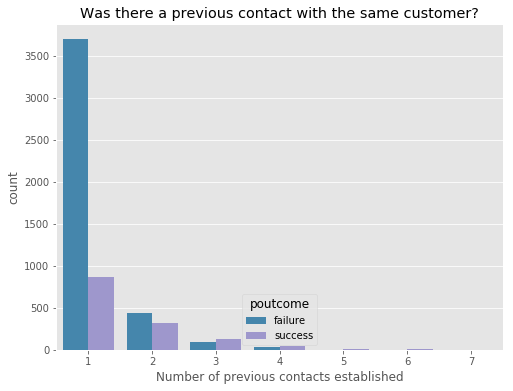

In [34]:
sns.countplot(x="previous", hue="poutcome", data=df_previous, palette=["C1","C2"])
plt.xlabel('Number of previous contacts established')
plt.title('Was there a previous contact with the same customer?')

In [35]:
gb_previous_poutcome = df_previous['y_dummy'].groupby([df_previous['previous'],df_previous['poutcome']] ) 
gb_previous_poutcome.mean()

previous  poutcome
1         failure     0.122024
          success     0.596532
2         failure     0.258065
          success     0.743750
3         failure     0.363636
          success     0.750000
4         failure     0.300000
          success     0.725000
5         failure     0.333333
          success     0.800000
6         failure     0.000000
          success     0.750000
7         success     0.000000
Name: y_dummy, dtype: float64

In [38]:
# Create a dataframe of entries who subscribed
df_subscribed = df_addi_full.loc[df_addi_full['y_dummy'] == 1]
df_subscribed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4640 entries, 75 to 41186
Data columns (total 26 columns):
age                 4640 non-null int64
job                 4640 non-null object
marital             4640 non-null object
education           4640 non-null object
default             4640 non-null object
housing             4640 non-null object
loan                4640 non-null object
contact             4640 non-null object
month               4640 non-null object
day_of_week         4640 non-null object
duration            4640 non-null int64
campaign            4640 non-null int64
pdays               4640 non-null int64
previous            4640 non-null int64
poutcome            4640 non-null object
emp.var.rate        4640 non-null float64
cons.price.idx      4640 non-null float64
cons.conf.idx       4640 non-null float64
euribor3m           4640 non-null float64
nr.employed         4640 non-null float64
y                   4640 non-null object
euribor3m_range     4635 non-n

In [48]:
pd.value_counts(df_subscribed['marital'])
# 54.6% are married

married     2532
single      1620
divorced     476
unknown       12
Name: marital, dtype: int64

In [49]:
pd.value_counts(df_subscribed['default'])
# 90.45% don't have credit default

no         4197
unknown     443
Name: default, dtype: int64

In [50]:
pd.value_counts(df_subscribed['loan'])
# 83% don't have personal loan

no         3850
yes         683
unknown     107
Name: loan, dtype: int64

In [51]:
pd.value_counts(df_subscribed['age_binned'])
# 33% young and 17% senior

young           1528
senior          1321
lower middle     995
middle           796
Name: age_binned, dtype: int64

In [53]:
df_subscribed['pdays'].median()
# Since this number is 999, most of them were never contacted

999.0

In [56]:
pd.value_counts(df_subscribed['duration_range'])
# 64% have duration 0-10 minutes; 30% have duration 10 to 20 minutes

0-10     2956
10-20    1363
20-30     261
30-40      42
40-50      12
60-70       3
50-60       3
80-90       0
70-80       0
Name: duration_range, dtype: int64

In [58]:
df_subscribed['previous'].median()

0.0